# Exploratory Data Analysis and Visualization

**Author:** Nino Gagnidze  
**Purpose:** Comprehensive exploratory analysis with statistical insights and visualizations

## Objectives
- Perform statistical analysis of customer demographics and behavior
- Create at least 5 different types of visualizations
- Investigate relationships and correlations between features
- Identify patterns, trends, and customer segments
- Generate insights for business decision-making

## Visualization Types Included
1. Distribution plots (histograms with KDE)
2. Box plots for outlier visualization
3. Correlation heatmap
4. Scatter plots with trend analysis
5. Bar charts for categorical variables
6. Pair plots for multivariate analysis
7. Violin plots
8. Pie charts

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path
sys.path.append('../src')

# Import custom visualization functions
from visualization import (
    plot_distribution,
    plot_boxplot,
    plot_correlation_heatmap,
    plot_scatter,
    plot_count_bar,
    plot_pairplot,
    plot_grouped_bar,
    plot_violin,
    plot_pie_chart,
    plot_multiple_distributions,
    create_statistical_summary_table
)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

In [2]:
# Load processed data
data_path = '../data/processed/mall_customers_processed.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset loaded successfully!
Shape: (200, 9)

Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Age_Group', 'Income_Category', 'Spending_Category', 'Gender_Encoded']


In [3]:
# Display first few rows
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Category,Spending_Category,Gender_Encoded
0,1,Male,19,15,39,Young (18-25),Low Income (<40k),Medium Spender,1
1,2,Male,21,15,81,Young (18-25),Low Income (<40k),High Spender,1
2,3,Female,20,16,6,Young (18-25),Low Income (<40k),Low Spender,0
3,4,Female,23,16,77,Young (18-25),Low Income (<40k),High Spender,0
4,5,Female,31,17,40,Adult (26-35),Low Income (<40k),Medium Spender,0
5,6,Female,22,17,76,Young (18-25),Low Income (<40k),High Spender,0
6,7,Female,35,18,6,Adult (26-35),Low Income (<40k),Low Spender,0
7,8,Female,23,18,94,Young (18-25),Low Income (<40k),High Spender,0
8,9,Male,64,19,3,Senior (50+),Low Income (<40k),Low Spender,1
9,10,Female,30,19,72,Adult (26-35),Low Income (<40k),High Spender,0


## 2. Statistical Summary

In [4]:
# Basic descriptive statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20,0.44
std,57.88,13.97,26.26,25.82,0.50
min,1.00,18.00,15.00,1.00,0.00
25%,50.75,28.75,41.50,34.75,0.00
50%,100.50,36.00,61.50,50.00,0.00
75%,150.25,49.00,78.00,73.00,1.00
max,200.00,70.00,137.00,99.00,1.00


In [5]:
# Comprehensive statistical summary
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
stats_summary = create_statistical_summary_table(df, numerical_features)

print("Comprehensive Statistical Summary:")
print("=" * 80)
stats_summary

Comprehensive Statistical Summary:


,Mean,Median,Std,Min,Max,Q1,Q3,IQR,Skewness,Kurtosis
Age,38.85,36.0,13.97,18,70,28.75,49.0,20.25,0.49,-0.67
Annual Income (k$),60.56,61.5,26.26,15,137,41.50,78.0,36.50,0.32,-0.10
Spending Score (1-100),50.20,50.0,25.82,1,99,34.75,73.0,38.25,-0.05,-0.83


In [6]:
# Categorical features summary
print("Gender Distribution:")
print(df['Gender'].value_counts())
print("\nPercentage:")
print((df['Gender'].value_counts(normalize=True) * 100).round(2))

Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64

Percentage:
Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


## 3. Visualization Type 1: Distribution Plots (Histograms with KDE)

Figure saved to: ../reports/figures/01_age_distribution.png


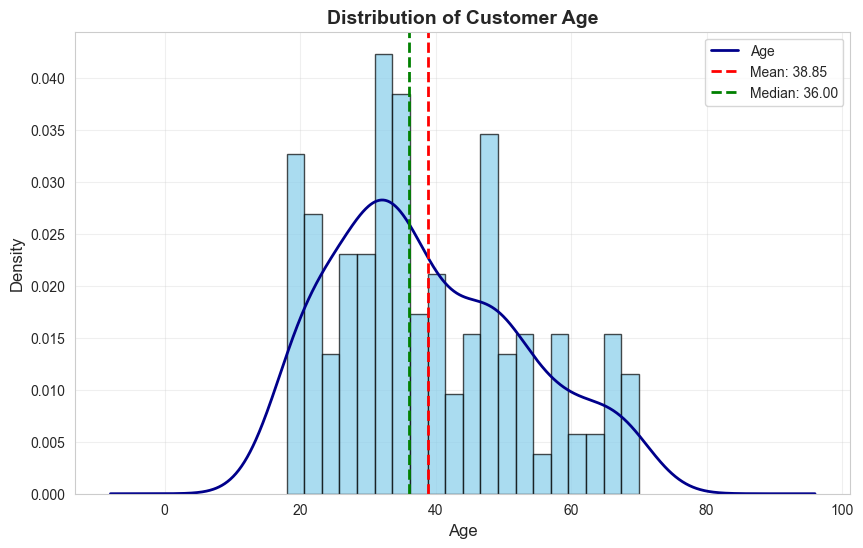

In [7]:
# Age distribution
plot_distribution(
    df, 
    'Age',
    title='Distribution of Customer Age',
    bins=20,
    color='skyblue',
    save_path='../reports/figures/01_age_distribution.png'
)

Figure saved to: ../reports/figures/02_income_distribution.png


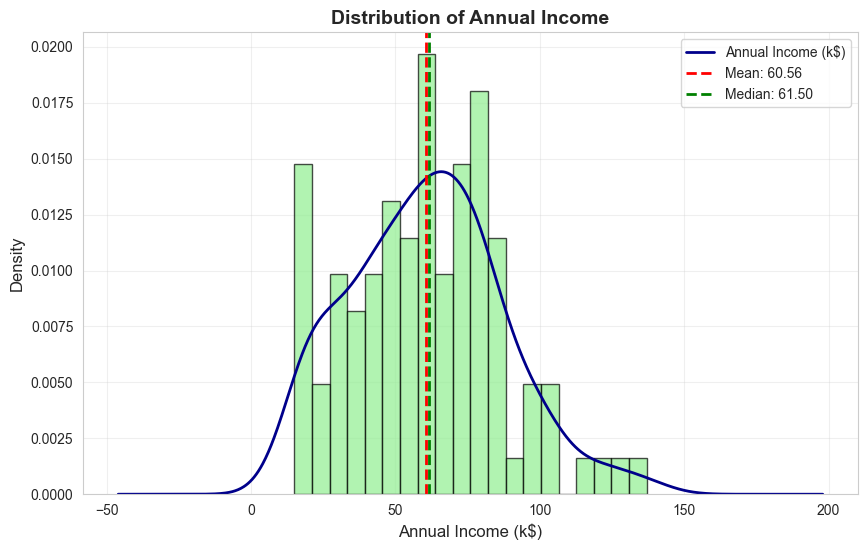

In [8]:
# Annual Income distribution
plot_distribution(
    df,
    'Annual Income (k$)',
    title='Distribution of Annual Income',
    bins=20,
    color='lightgreen',
    save_path='../reports/figures/02_income_distribution.png'
)

Figure saved to: ../reports/figures/03_spending_distribution.png


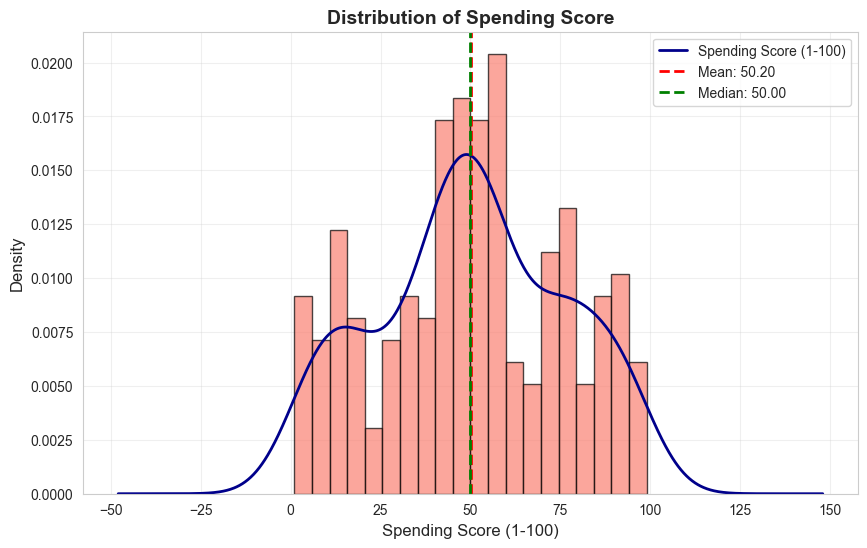

In [9]:
# Spending Score distribution
plot_distribution(
    df,
    'Spending Score (1-100)',
    title='Distribution of Spending Score',
    bins=20,
    color='salmon',
    save_path='../reports/figures/03_spending_distribution.png'
)

## 4. Visualization Type 2: Box Plots

Figure saved to: ../reports/figures/04_boxplots_all_features.png


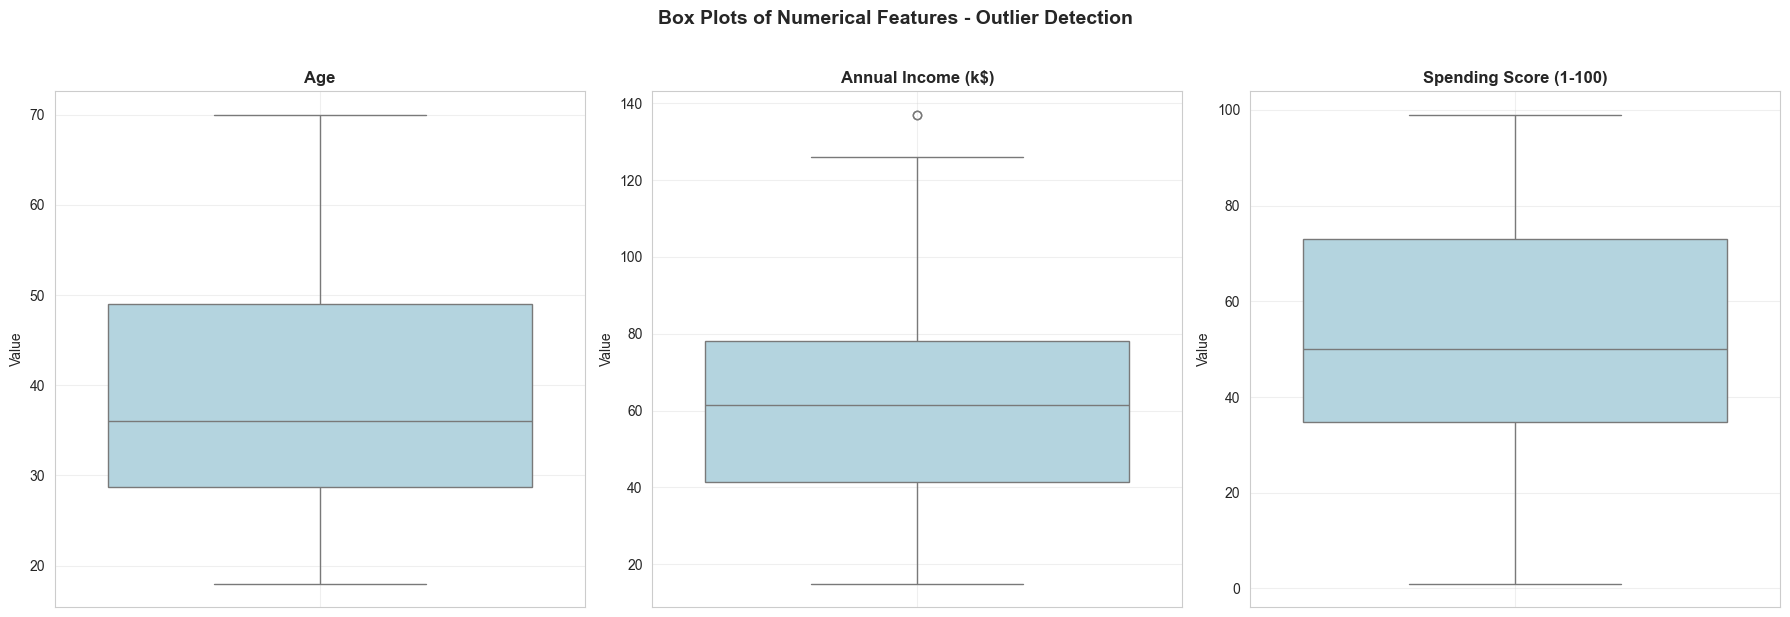

In [10]:
# Box plots for all numerical features
plot_boxplot(
    df,
    numerical_features,
    title='Box Plots of Numerical Features - Outlier Detection',
    save_path='../reports/figures/04_boxplots_all_features.png'
)

## 5. Visualization Type 3: Correlation Heatmap

Figure saved to: ../reports/figures/05_correlation_heatmap.png


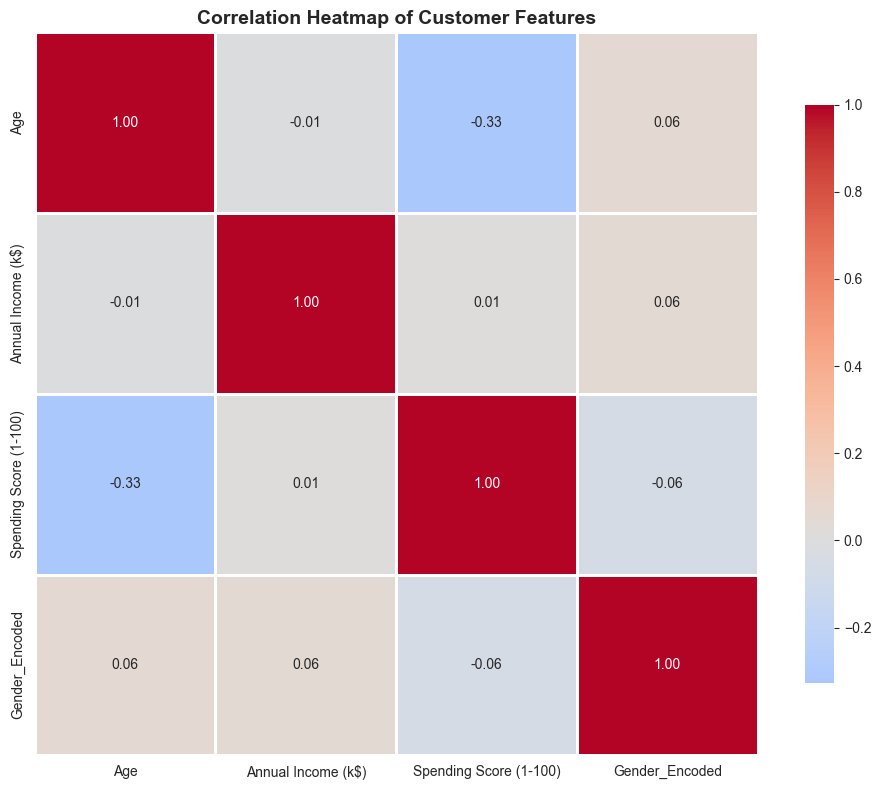

In [11]:
# Correlation heatmap for numerical features
correlation_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded']
plot_correlation_heatmap(
    df,
    columns=correlation_features,
    title='Correlation Heatmap of Customer Features',
    save_path='../reports/figures/05_correlation_heatmap.png'
)

In [12]:
# Print correlation matrix
print("Correlation Matrix:")
print(df[correlation_features].corr().round(3))

Correlation Matrix:
                         Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.00               -0.01                   -0.33   
Annual Income (k$)     -0.01                1.00                    0.01   
Spending Score (1-100) -0.33                0.01                    1.00   
Gender_Encoded          0.06                0.06                   -0.06   

                        Gender_Encoded  
Age                               0.06  
Annual Income (k$)                0.06  
Spending Score (1-100)           -0.06  
Gender_Encoded                    1.00  


## 6. Visualization Type 4: Scatter Plots

Figure saved to: ../reports/figures/06_income_vs_spending.png


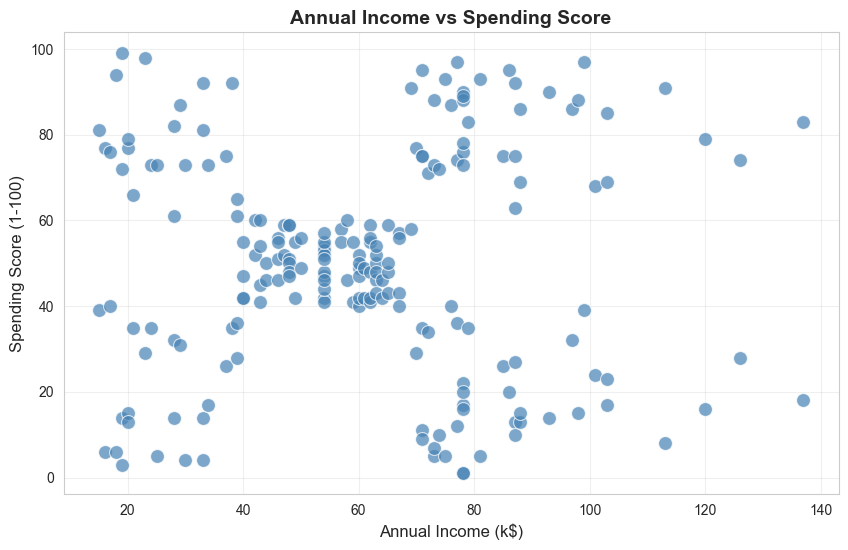

In [13]:
# Scatter plot: Income vs Spending Score
plot_scatter(
    df,
    'Annual Income (k$)',
    'Spending Score (1-100)',
    title='Annual Income vs Spending Score',
    save_path='../reports/figures/06_income_vs_spending.png'
)

Figure saved to: ../reports/figures/07_income_vs_spending_by_gender.png


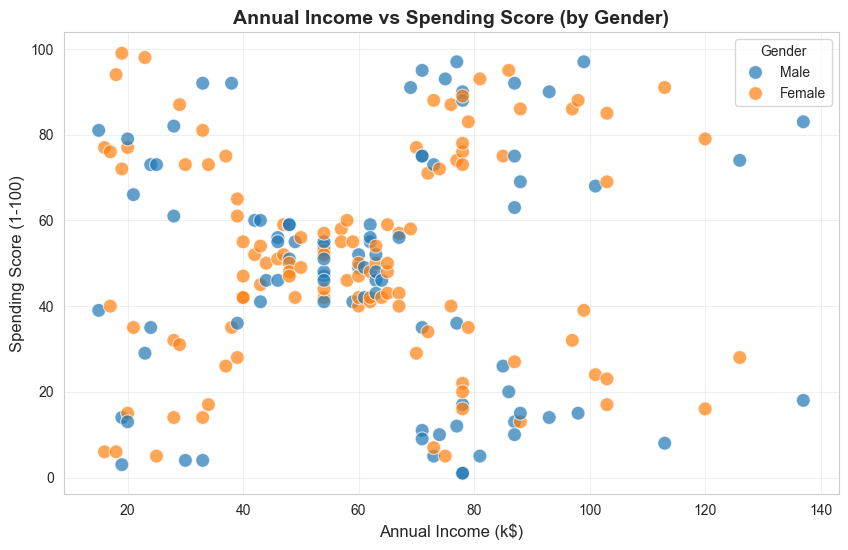

In [14]:
# Scatter plot with Gender coloring
plot_scatter(
    df,
    'Annual Income (k$)',
    'Spending Score (1-100)',
    hue='Gender',
    title='Annual Income vs Spending Score (by Gender)',
    save_path='../reports/figures/07_income_vs_spending_by_gender.png'
)

Figure saved to: ../reports/figures/08_age_vs_spending.png


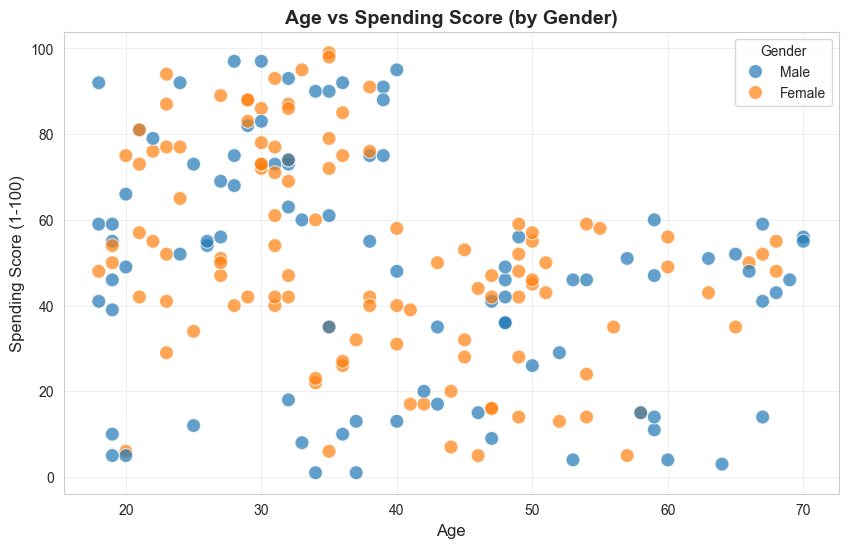

In [15]:
# Scatter plot: Age vs Spending Score
plot_scatter(
    df,
    'Age',
    'Spending Score (1-100)',
    hue='Gender',
    title='Age vs Spending Score (by Gender)',
    save_path='../reports/figures/08_age_vs_spending.png'
)

## 7. Visualization Type 5: Bar Charts

Figure saved to: ../reports/figures/09_gender_distribution.png


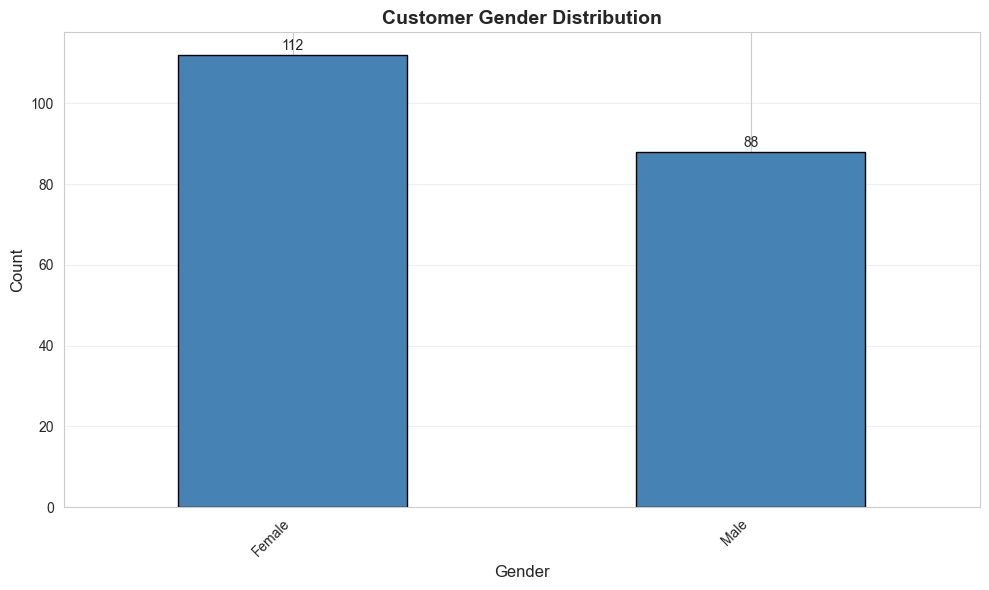

In [16]:
# Gender distribution bar chart
plot_count_bar(
    df,
    'Gender',
    title='Customer Gender Distribution',
    save_path='../reports/figures/09_gender_distribution.png'
)

Figure saved to: ../reports/figures/10_age_group_distribution.png


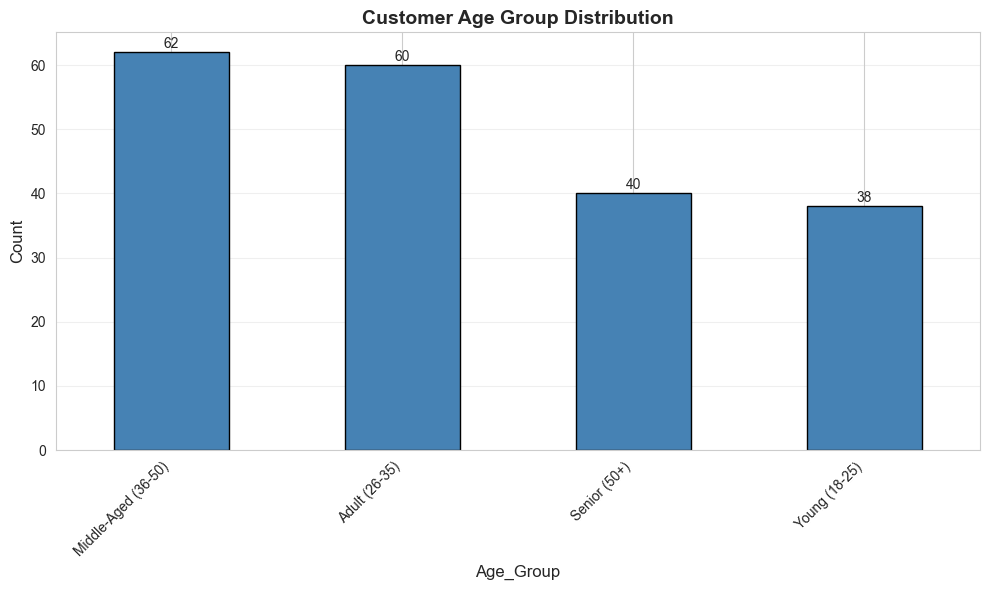

In [17]:
# Age Group distribution
plot_count_bar(
    df,
    'Age_Group',
    title='Customer Age Group Distribution',
    save_path='../reports/figures/10_age_group_distribution.png'
)

Figure saved to: ../reports/figures/11_income_category_distribution.png


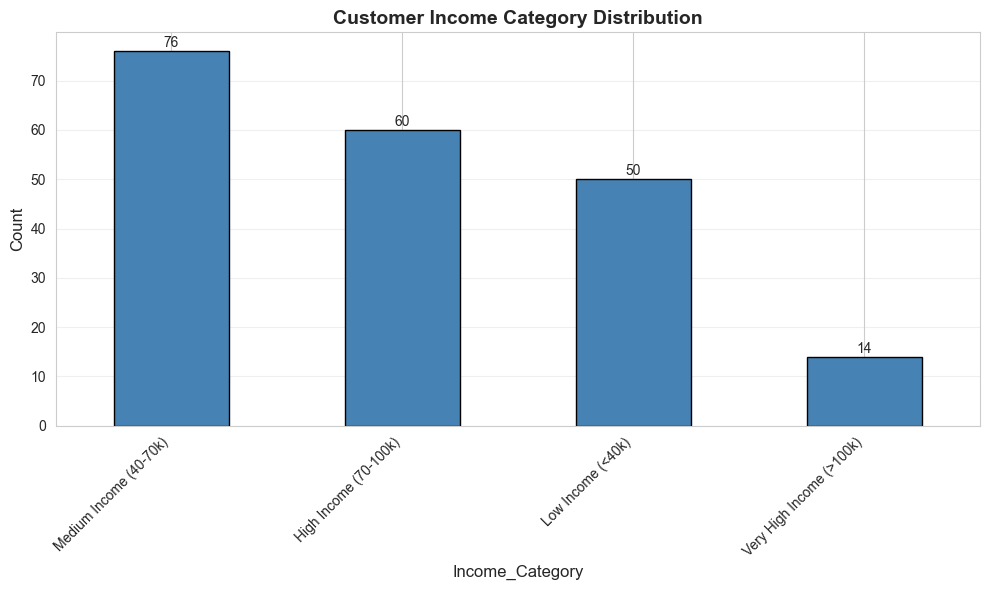

In [18]:
# Income Category distribution
plot_count_bar(
    df,
    'Income_Category',
    title='Customer Income Category Distribution',
    save_path='../reports/figures/11_income_category_distribution.png'
)

Figure saved to: ../reports/figures/12_spending_category_distribution.png


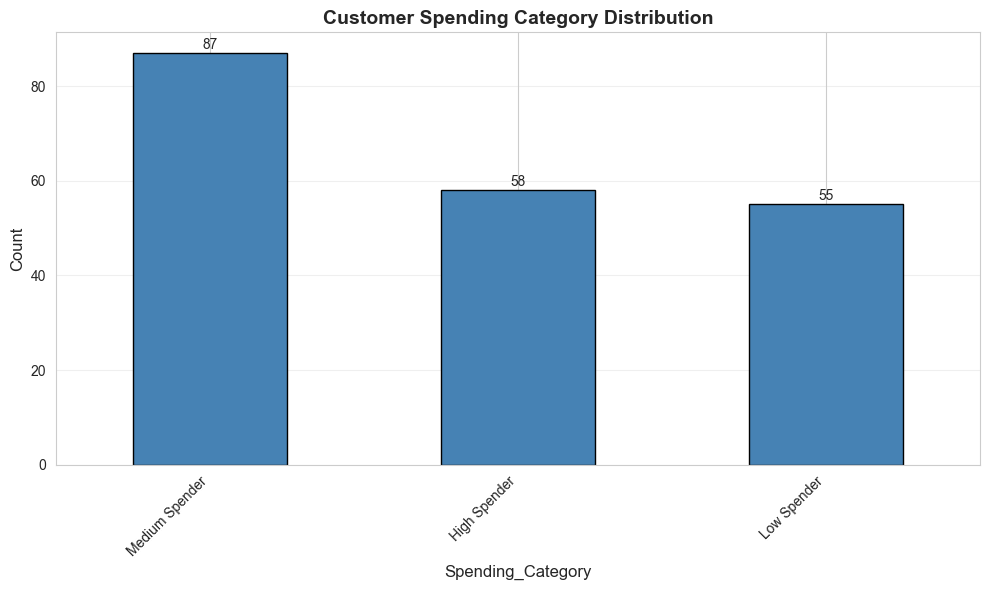

In [19]:
# Spending Category distribution
plot_count_bar(
    df,
    'Spending_Category',
    title='Customer Spending Category Distribution',
    save_path='../reports/figures/12_spending_category_distribution.png'
)

## 8. Visualization Type 6: Pair Plots

Figure saved to: ../reports/figures/13_pairplot_by_gender.png


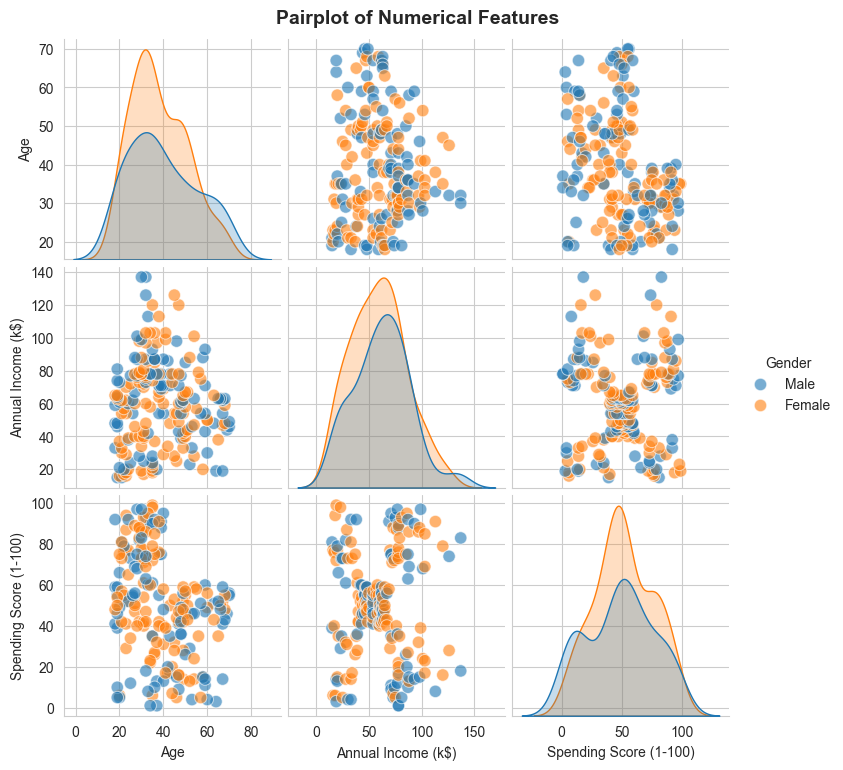

In [20]:
# Pair plot for numerical features colored by Gender
plot_pairplot(
    df,
    numerical_features,
    hue='Gender',
    save_path='../reports/figures/13_pairplot_by_gender.png'
)

## 9. Visualization Type 7: Violin Plots

Figure saved to: ../reports/figures/14_spending_violin_by_gender.png


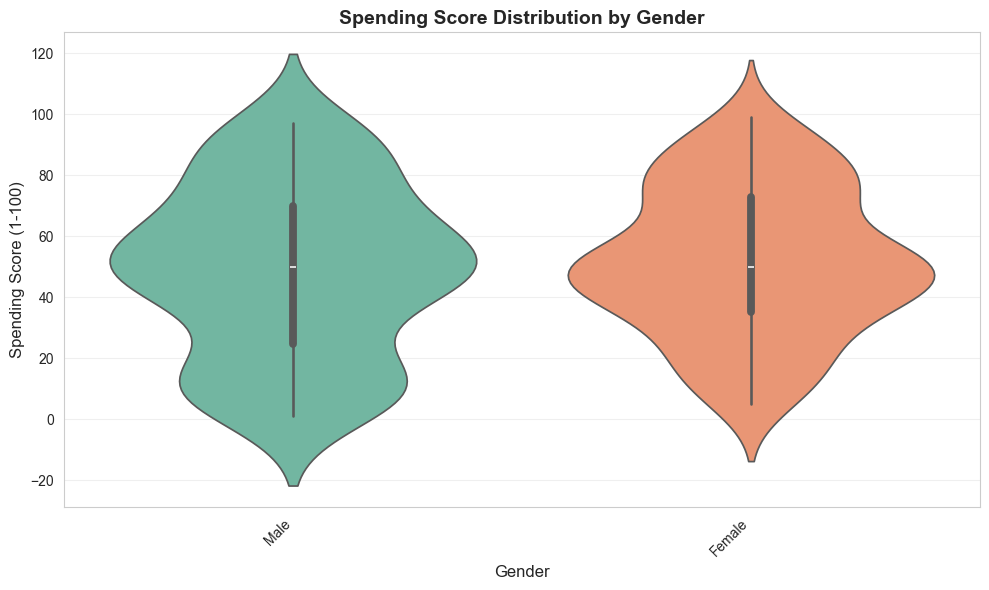

In [21]:
# Violin plot: Spending Score by Gender
plot_violin(
    df,
    x_col='Gender',
    y_col='Spending Score (1-100)',
    title='Spending Score Distribution by Gender',
    save_path='../reports/figures/14_spending_violin_by_gender.png'
)

Figure saved to: ../reports/figures/15_income_violin_by_age_group.png


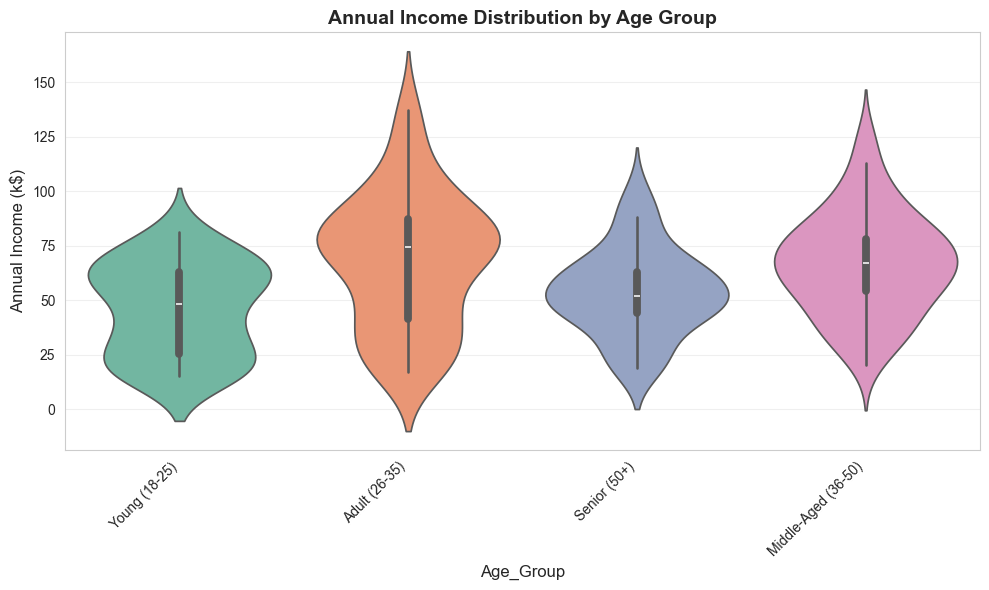

In [22]:
# Violin plot: Income by Age Group
plot_violin(
    df,
    x_col='Age_Group',
    y_col='Annual Income (k$)',
    title='Annual Income Distribution by Age Group',
    save_path='../reports/figures/15_income_violin_by_age_group.png'
)

## 10. Visualization Type 8: Pie Charts

Figure saved to: ../reports/figures/16_gender_pie_chart.png


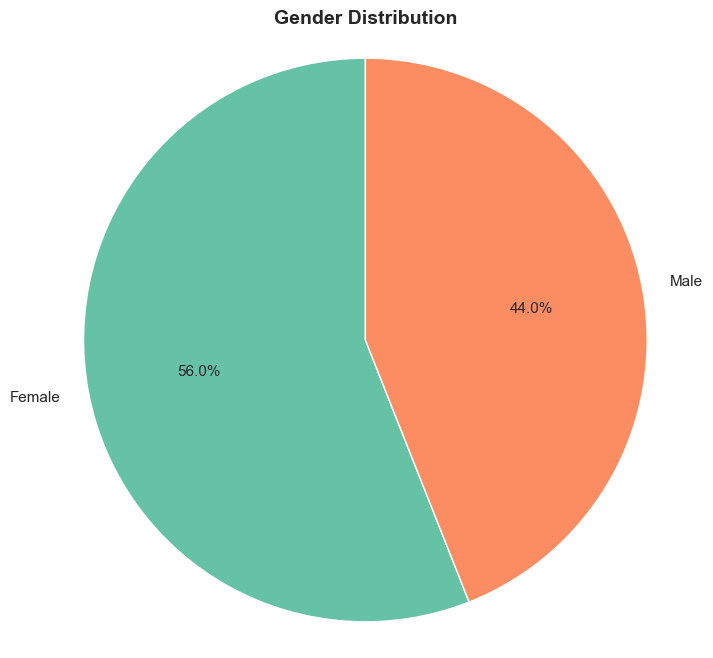

In [23]:
# Pie chart for Gender
plot_pie_chart(
    df,
    'Gender',
    title='Gender Distribution',
    save_path='../reports/figures/16_gender_pie_chart.png'
)

Figure saved to: ../reports/figures/17_spending_category_pie_chart.png


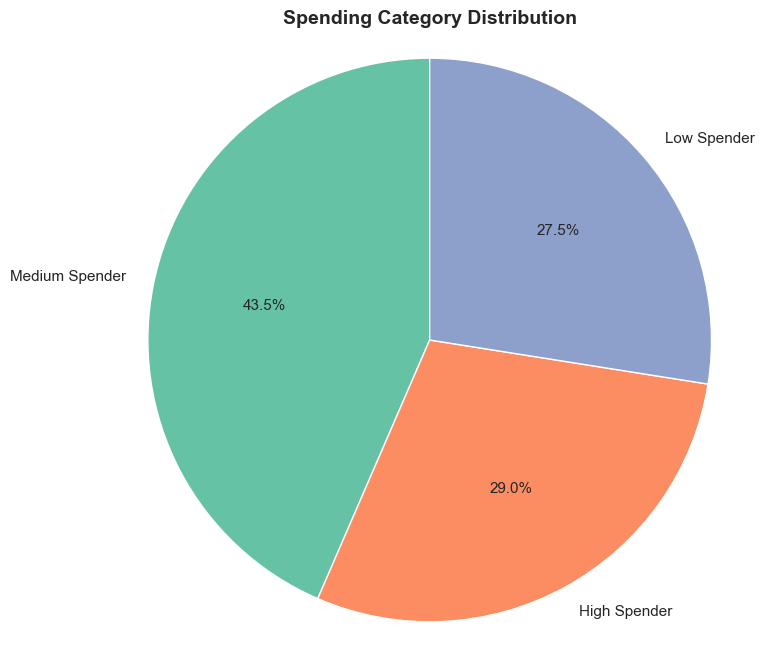

In [24]:
# Pie chart for Spending Category
plot_pie_chart(
    df,
    'Spending_Category',
    title='Spending Category Distribution',
    save_path='../reports/figures/17_spending_category_pie_chart.png'
)

## 11. Grouped Analysis

Figure saved to: ../reports/figures/18_age_group_by_gender.png


<Figure size 1200x600 with 0 Axes>

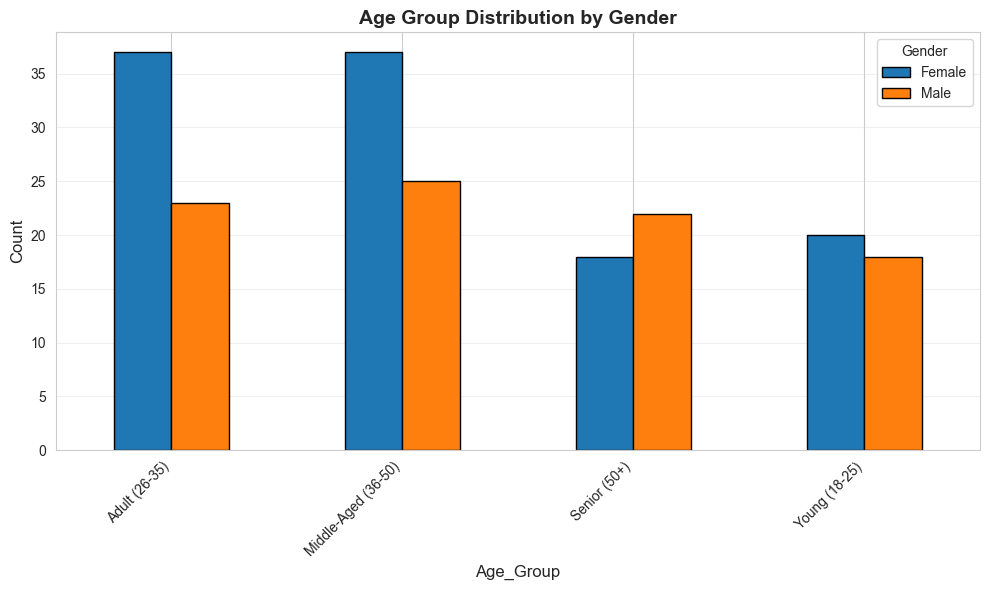

In [25]:
# Grouped bar chart: Age Group by Gender
plot_grouped_bar(
    df,
    'Age_Group',
    'Gender',
    title='Age Group Distribution by Gender',
    save_path='../reports/figures/18_age_group_by_gender.png'
)

Figure saved to: ../reports/figures/19_income_category_by_gender.png


<Figure size 1200x600 with 0 Axes>

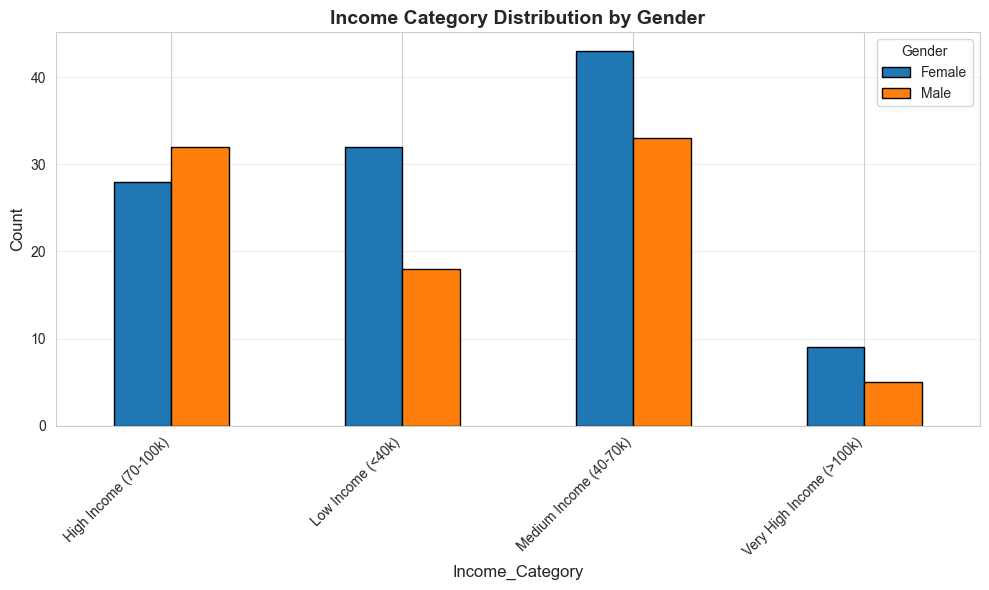

In [26]:
# Grouped bar chart: Income Category by Gender
plot_grouped_bar(
    df,
    'Income_Category',
    'Gender',
    title='Income Category Distribution by Gender',
    save_path='../reports/figures/19_income_category_by_gender.png'
)

## 12. Statistical Analysis by Groups

In [27]:
# Average statistics by Gender
print("Average Statistics by Gender:")
print("=" * 80)
gender_stats = df.groupby('Gender')[numerical_features].mean().round(2)
print(gender_stats)

Average Statistics by Gender:
          Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                   
Female  38.10               59.25                   51.53
Male    39.81               62.23                   48.51


In [28]:
# Average statistics by Age Group
print("Average Statistics by Age Group:")
print("=" * 80)
age_group_stats = df.groupby('Age_Group')[numerical_features].mean().round(2)
print(age_group_stats)

Average Statistics by Age Group:
                       Age  Annual Income (k$)  Spending Score (1-100)
Age_Group                                                             
Adult (26-35)        31.08               68.15                   64.45
Middle-Aged (36-50)  43.27               66.66                   41.71
Senior (50+)         60.45               53.85                   37.48
Young (18-25)        21.16               45.68                   54.95


In [29]:
# Average statistics by Income Category
print("Average Statistics by Income Category:")
print("=" * 80)
income_stats = df.groupby('Income_Category')[numerical_features].mean().round(2)
print(income_stats)

Average Statistics by Income Category:
                            Age  Annual Income (k$)  Spending Score (1-100)
Income_Category                                                            
High Income (70-100k)     36.67               81.10                   50.52
Low Income (<40k)         35.28               27.40                   49.48
Medium Income (40-70k)    43.28               56.18                   50.68
Very High Income (>100k)  36.93              114.71                   48.79


In [30]:
# Average statistics by Spending Category
print("Average Statistics by Spending Category:")
print("=" * 80)
spending_stats = df.groupby('Spending_Category')[numerical_features].mean().round(2)
print(spending_stats)

Average Statistics by Spending Category:
                     Age  Annual Income (k$)  Spending Score (1-100)
Spending_Category                                                   
High Spender       30.00               65.29                   82.07
Low Spender        42.91               65.24                   17.44
Medium Spender     42.18               54.45                   49.67


## 13. Cross-tabulation Analysis

In [31]:
# Cross-tabulation: Gender vs Age Group
print("Cross-tabulation: Gender vs Age Group")
print("=" * 80)
ct1 = pd.crosstab(df['Gender'], df['Age_Group'], margins=True)
print(ct1)

Cross-tabulation: Gender vs Age Group
Age_Group  Adult (26-35)  Middle-Aged (36-50)  Senior (50+)  Young (18-25)  \
Gender                                                                       
Female                37                   37            18             20   
Male                  23                   25            22             18   
All                   60                   62            40             38   

Age_Group  All  
Gender          
Female     112  
Male        88  
All        200  


In [32]:
# Cross-tabulation: Gender vs Income Category
print("Cross-tabulation: Gender vs Income Category")
print("=" * 80)
ct2 = pd.crosstab(df['Gender'], df['Income_Category'], margins=True)
print(ct2)

Cross-tabulation: Gender vs Income Category
Income_Category  High Income (70-100k)  Low Income (<40k)  \
Gender                                                      
Female                              28                 32   
Male                                32                 18   
All                                 60                 50   

Income_Category  Medium Income (40-70k)  Very High Income (>100k)  All  
Gender                                                                  
Female                               43                         9  112  
Male                                 33                         5   88  
All                                  76                        14  200  


In [33]:
# Cross-tabulation: Income Category vs Spending Category
print("Cross-tabulation: Income Category vs Spending Category")
print("=" * 80)
ct3 = pd.crosstab(df['Income_Category'], df['Spending_Category'], margins=True)
print(ct3)

Cross-tabulation: Income Category vs Spending Category
Spending_Category         High Spender  Low Spender  Medium Spender  All
Income_Category                                                         
High Income (70-100k)               29           27               4   60
Low Income (<40k)                   20           20              10   50
Medium Income (40-70k)               2            1              73   76
Very High Income (>100k)             7            7               0   14
All                                 58           55              87  200


## 14. Key Insights and Patterns

### Distribution Analysis:
- **Age Distribution:** 
  - Mean: 38.85 years, Median: 36 years
  - Slight positive skewness (0.49) - more younger customers
  - Most customers are Middle-Aged (31%) and Adults (30%)
  - Range: 18-70 years with balanced distribution

- **Income Distribution:**
  - Mean: $60.56k, Median: $61.5k
  - Slight positive skewness (0.32) - slightly right-skewed
  - 38% fall in Medium Income category (40-70k)
  - 2 outliers with very high income ($137k)
  - Relatively balanced across income levels

- **Spending Score Distribution:**
  - Mean: 50.2, Median: 50.0 (nearly uniform distribution)
  - Slight negative skewness (-0.05) - almost perfectly symmetric
  - 43.5% are Medium Spenders, 29% High Spenders, 27.5% Low Spenders
  - Full range utilized (1-99), indicating diverse spending behaviors

### Correlation Findings:
- **Income vs Spending Score:** Correlation = 0.01 (virtually ZERO)
  - **KEY INSIGHT:** Income does NOT predict spending behavior
  - High-income customers can be low spenders and vice versa
  - This validates the need for clustering to identify distinct segments

- **Age vs Spending Score:** Correlation = -0.33 (moderate negative)
  - **KEY INSIGHT:** Younger customers tend to spend more
  - As age increases, spending scores decrease
  - Young (18-25): Average spending 54.95
  - Adult (26-35): Average spending 64.45 (HIGHEST)
  - Senior (50+): Average spending 37.48 (LOWEST)

- **Gender impact on spending:** Correlation = -0.06 (negligible)
  - Female average spending: 51.53
  - Male average spending: 48.51
  - Gender is NOT a strong predictor of spending behavior

### Customer Segments Identified (from visual analysis):
1. **High Income, High Spenders** - Premium customers visible in upper-right quadrant of Income vs Spending plot
2. **High Income, Low Spenders** - Conservative wealthy customers in upper-left quadrant
3. **Low Income, High Spenders** - Impulsive buyers in lower-right quadrant
4. **Low Income, Low Spenders** - Budget-conscious in lower-left quadrant
5. **Medium Income, Medium Spenders** - Balanced majority in center region

### Business Insights:
1. **Age-Based Targeting:**
   - Focus marketing on Adults (26-35) - they have highest spending scores (64.45)
   - Seniors (50+) need different approach - lower spending but potentially more loyal
   - Young customers (18-25) show high spending potential despite lower income

2. **Income Paradox:**
   - Income alone does NOT determine customer value
   - Must segment customers based on BEHAVIOR, not just demographics
   - High-income customers with low spending represent growth opportunity

3. **Gender Neutrality:**
   - Marketing strategies should not heavily differentiate by gender
   - Both genders show similar spending patterns
   - Focus on behavioral segmentation rather than demographic gender splits

4. **Spending Categories:**
   - Medium Spenders (43.5%) are the largest group - stable revenue base
   - High and Low Spenders (29% + 27.5% = 56.5%) require targeted strategies
   - Need to identify what drives spending behavior beyond income

### Patterns Observed:
- **Cross-Category Insight:** High and Low income customers are distributed across ALL spending categories
  - Medium Income customers mostly fall in Medium Spending (73 out of 76)
  - High Income split between High Spenders (29) and Low Spenders (27)
  - This confirms income-spending disconnect

- **Age Group Patterns:**
  - Adults (26-35) have highest average income ($68.15k) AND highest spending (64.45)
  - Middle-Aged (36-50) have second-highest income but lower spending (41.71)
  - Seniors (50+) have lowest income ($53.85k) and lowest spending (37.48)

- **Clear Cluster Structure:** 
  - Scatter plots reveal distinct groupings in Income vs Spending space
  - 5 visible clusters emerge naturally from the data
  - This supports using K-Means clustering for formal segmentation

### Anomalies or Interesting Findings:
- **The Income Paradox:** Customers with $137k income (outliers) have VERY different spending scores (18 and 83)
  - One is an extreme low spender, one is a high spender
  - Same income, completely opposite behaviors
  - Reinforces that income alone cannot predict customer value

- **Middle Income Homogeneity:** 76 Medium Income customers show remarkably consistent behavior
  - 96% are Medium Spenders (73 out of 76)
  - This is the most predictable segment
  - Suggests income range 40-70k creates spending stability

- **Age-Spending Relationship Stronger than Income-Spending:**
  - Age correlation (-0.33) is 33x stronger than Income correlation (0.01)
  - Life stage matters more than purchasing power
  - Behavioral targeting should emphasize age/life stage over income level

### Recommendations for Next Steps:
1. Apply K-Means clustering with k=5 based on visual cluster identification
2. Use Income and Spending Score as primary clustering features
3. Build classification models to predict customer segments for new customers
4. Develop targeted strategies for each identified segment

## 15. Save EDA Summary Report

In [34]:
# Save comprehensive EDA report
report_path = '../reports/results/eda_summary_report.txt'

with open(report_path, 'w') as f:
    f.write("EXPLORATORY DATA ANALYSIS SUMMARY REPORT\n")
    f.write("=" * 80 + "\n\n")
    
    f.write("1. DATASET OVERVIEW\n")
    f.write("-" * 80 + "\n")
    f.write(f"Total Records: {len(df)}\n")
    f.write(f"Total Features: {len(df.columns)}\n\n")
    
    f.write("2. STATISTICAL SUMMARY\n")
    f.write("-" * 80 + "\n")
    f.write(stats_summary.to_string())
    f.write("\n\n")
    
    f.write("3. CORRELATION ANALYSIS\n")
    f.write("-" * 80 + "\n")
    f.write(df[correlation_features].corr().to_string())
    f.write("\n\n")
    
    f.write("4. CATEGORICAL DISTRIBUTIONS\n")
    f.write("-" * 80 + "\n")
    f.write("Gender Distribution:\n")
    f.write(df['Gender'].value_counts().to_string())
    f.write("\n\nAge Group Distribution:\n")
    f.write(df['Age_Group'].value_counts().to_string())
    f.write("\n\nIncome Category Distribution:\n")
    f.write(df['Income_Category'].value_counts().to_string())
    f.write("\n\nSpending Category Distribution:\n")
    f.write(df['Spending_Category'].value_counts().to_string())
    f.write("\n\n")
    
    f.write("5. GROUP STATISTICS\n")
    f.write("-" * 80 + "\n")
    f.write("Average by Gender:\n")
    f.write(gender_stats.to_string())
    f.write("\n\nAverage by Age Group:\n")
    f.write(age_group_stats.to_string())
    f.write("\n\nAverage by Income Category:\n")
    f.write(income_stats.to_string())
    f.write("\n\nAverage by Spending Category:\n")
    f.write(spending_stats.to_string())
    f.write("\n\n")
    
    f.write("6. VISUALIZATIONS CREATED\n")
    f.write("-" * 80 + "\n")
    f.write("Total visualizations: 19\n")
    f.write("Types: Distribution plots, Box plots, Correlation heatmap, \n")
    f.write("       Scatter plots, Bar charts, Pair plots, Violin plots, Pie charts\n")
    f.write("All figures saved to: reports/figures/\n")

print(f"EDA summary report saved to: {report_path}")

EDA summary report saved to: ../reports/results/eda_summary_report.txt


In [35]:
# Display total number of visualizations created
import os
figures_dir = '../reports/figures/'
figure_count = len([f for f in os.listdir(figures_dir) if f.endswith('.png')])
print(f"Total visualizations created and saved: {figure_count}")
print(f"Location: {figures_dir}")

Total visualizations created and saved: 19
Location: ../reports/figures/


## Summary

This EDA notebook has successfully:
- Performed comprehensive statistical analysis of all features
- Created 8+ different types of visualizations (19 total figures)
- Analyzed correlations and relationships between features
- Generated insights through grouped analysis and cross-tabulations
- Saved all visualizations and reports for presentation

**Next Steps:**
1. Use insights to inform machine learning model selection
2. Apply K-Means clustering to identify customer segments
3. Build classification models to predict customer categories